In [115]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [126]:
df_Lars = pd.read_csv('dataLars2/HEARTRATE_AUTO/HEARTRATE_AUTO_1699373816164.csv')
df_Lars['person'] = 'Lars'
df_Tjielke = pd.read_csv('dataTjielke/HEARTRATE_AUTO/HEARTRATE_AUTO_1698683242054.csv')
df_Tjielke['person'] = 'Tjielke'
df_Yidan = pd.read_csv('dataYidan2/HEARTRATE_AUTO/HEARTRATE_AUTO_1699473776998.csv')
df_Yidan['person'] = 'Yidan'
df_George = pd.read_csv('dataGeorge/HEARTRATE_AUTO/HEARTRATE_AUTO_1698694372183.csv')
df_George['person'] = 'George'
df_Jeroen = pd.read_csv('dataJeroen/HEARTRATE_AUTO/HEARTRATE_AUTO_1699473692075.csv')
df_Jeroen['person'] = 'Jeroen'

df_Jeroen['date'] = pd.to_datetime(df_Jeroen['date'], format='%d/%m/%Y')
df_Jeroen['date'] = df_Jeroen['date'].dt.strftime('%Y-%m-%d')

In [127]:
activity_Lars = pd.read_csv('dataLars2/ACTIVITY_STAGE/ACTIVITY_STAGE_1699373815860.csv')
activity_Lars['person'] = 'Lars'
activity_Tjielke = pd.read_csv('dataTjielke/ACTIVITY_STAGE/ACTIVITY_STAGE_1698683241768.csv')
activity_Tjielke['person'] = 'Tjielke'
activity_Yidan = pd.read_csv('dataYidan2/ACTIVITY_STAGE/ACTIVITY_STAGE_1699473776714.csv')
activity_Yidan['person'] = 'Yidan'
activity_George = pd.read_csv('dataGeorge/ACTIVITY_STAGE/ACTIVITY_STAGE_1698694372098.csv')
activity_George['person'] = 'George'
activity_Jeroen = pd.read_csv('dataJeroen/ACTIVITY_STAGE/ACTIVITY_STAGE_1699473691804.csv')
activity_Jeroen['person'] = 'Jeroen'

activity_Jeroen['date'] = pd.to_datetime(activity_Jeroen['date'], format='%d/%m/%Y')
activity_Jeroen['date'] = activity_Jeroen['date'].dt.strftime('%Y-%m-%d')

In [129]:
def add_walk(change_date, df1):

    df1['date'] = pd.to_datetime(df1['date'])
    df1['walked outside'] = (df1['date'] >= pd.to_datetime(change_date)).astype(int)

    return df1

In [130]:
df_George = add_walk('2023-10-29', df_George)
df_Lars = add_walk('2023-10-30', df_Lars)
df_Tjielke = add_walk('2023-10-24', df_Tjielke)
df_Yidan = add_walk('2023-10-14', df_Yidan)
df_Jeroen = add_walk('2023-10-29', df_Jeroen)

In [131]:
df_Jeroen = df_Jeroen[(df_Jeroen['date'] > pd.to_datetime('2023-10-01')) & (df_Jeroen['date'] < pd.to_datetime('2023-11-09'))]

df_Jeroen = df_Jeroen.sort_values(by='date')
df_Jeroen

,date,time,heartRate,person,walked outside
16834,2023-10-02,00:19,62,Jeroen,0
17722,2023-10-02,15:26,65,Jeroen,0
17721,2023-10-02,15:25,78,Jeroen,0
17720,2023-10-02,15:24,64,Jeroen,0
17719,2023-10-02,15:23,71,Jeroen,0
...,...,...,...,...,...
58601,2023-11-08,15:57,76,Jeroen,1
58600,2023-11-08,15:56,67,Jeroen,1
58599,2023-11-08,15:55,67,Jeroen,1
58675,2023-11-08,17:16,78,Jeroen,1


In [132]:
activity_Jeroen

,date,start,stop,distance,calories,steps,person
0,2023-09-19,23:40,23:45,132,5,190,Jeroen
1,2023-09-19,22:29,23:23,1508,56,2063,Jeroen
2,2023-09-19,21:49,22:23,281,16,389,Jeroen
3,2023-09-19,20:43,20:47,264,11,377,Jeroen
4,2023-09-19,20:24,20:42,122,5,175,Jeroen
...,...,...,...,...,...,...,...
494,2023-11-08,19:52,20:17,446,15,609,Jeroen
495,2023-11-08,17:50,17:55,166,5,238,Jeroen
496,2023-11-08,17:03,17:07,389,14,460,Jeroen
497,2023-11-08,16:32,16:39,706,26,852,Jeroen


In [133]:
df_Jeroen

,date,time,heartRate,person,walked outside
16834,2023-10-02,00:19,62,Jeroen,0
17722,2023-10-02,15:26,65,Jeroen,0
17721,2023-10-02,15:25,78,Jeroen,0
17720,2023-10-02,15:24,64,Jeroen,0
17719,2023-10-02,15:23,71,Jeroen,0
...,...,...,...,...,...
58601,2023-11-08,15:57,76,Jeroen,1
58600,2023-11-08,15:56,67,Jeroen,1
58599,2023-11-08,15:55,67,Jeroen,1
58675,2023-11-08,17:16,78,Jeroen,1


In [156]:
hrData = pd.concat([df_George, df_Lars, df_Tjielke, df_Yidan, df_Jeroen])
walkData = pd.concat([activity_George, activity_Lars, activity_Tjielke, activity_Yidan, activity_Jeroen])
hrData, walkData

(            date   time  heartRate  person  walked outside
 0     2023-09-29  09:58         86  George               0
 1     2023-09-29  09:59        119  George               0
 2     2023-09-29  10:00        100  George               0
 3     2023-09-29  10:01         92  George               0
 4     2023-09-29  10:02         92  George               0
 ...          ...    ...        ...     ...             ...
 58601 2023-11-08  15:57         76  Jeroen               1
 58600 2023-11-08  15:56         67  Jeroen               1
 58599 2023-11-08  15:55         67  Jeroen               1
 58675 2023-11-08  17:16         78  Jeroen               1
 58883 2023-11-08  20:56         77  Jeroen               1
 
 [200610 rows x 5 columns],
            date  start   stop  distance  calories  steps  person
 0    2023-09-29  10:01  10:08       755        27    932  George
 1    2023-09-29  10:49  10:59       894        37   1116  George
 2    2023-09-29  11:45  12:02       103         8  

In [161]:
daily_walk

(          date   person  heartRate  walked outside
 0   2023-09-12  Tjielke  66.033333             0.0
 1   2023-09-13  Tjielke  40.233333             0.0
 2   2023-09-14  Tjielke  40.000000             0.0
 3   2023-09-15  Tjielke  40.800000             0.0
 4   2023-09-16  Tjielke  40.000000             0.0
 ..         ...      ...        ...             ...
 181 2023-11-06     Lars  40.000000             1.0
 182 2023-11-06    Yidan  52.533333             1.0
 183 2023-11-07     Lars  44.566667             1.0
 184 2023-11-07    Yidan  54.766667             1.0
 185 2023-11-08   Jeroen  58.866667             1.0
 
 [186 rows x 4 columns],
           date   person  steps  distance
 0   2023-09-12  Tjielke   2265      1707
 1   2023-09-13  Tjielke   6970      5617
 2   2023-09-14  Tjielke  15546     11736
 3   2023-09-15  Tjielke   4562      3616
 4   2023-09-16  Tjielke   3116      2385
 ..         ...      ...    ...       ...
 189 2023-11-06     Lars   8104      6494
 190 2023-11-

In [162]:
import pandas as pd

# Assuming hrData and walkData are your original DataFrames

# Convert 'date' columns to datetime format
hrData['date'] = pd.to_datetime(hrData['date'])
walkData['date'] = pd.to_datetime(walkData['date'])

# Calculate daily_hr
daily_hr = hrData.groupby(['date', 'person']).apply(lambda group: group.nsmallest(30, 'heartRate')[['heartRate', 'walked outside']].mean())

# Calculate daily_walk
daily_walk = walkData.groupby(['date', 'person'])[['steps', 'distance']].sum()

# Resetting the indices to avoid potential index-related issues
daily_hr.reset_index(inplace=True)
daily_walk.reset_index(inplace=True)

# Merge DataFrames based on 'date' and 'person'
merged_df = pd.merge(daily_hr, daily_walk, on=['date', 'person'], how='inner')
preprocessed_df = merged_df
preprocessed_df

,date,person,heartRate,walked outside,steps,distance
0,2023-09-12,Tjielke,66.033333,0.0,2265,1707
1,2023-09-13,Tjielke,40.233333,0.0,6970,5617
2,2023-09-14,Tjielke,40.000000,0.0,15546,11736
3,2023-09-15,Tjielke,40.800000,0.0,4562,3616
4,2023-09-16,Tjielke,40.000000,0.0,3116,2385
...,...,...,...,...,...,...
176,2023-11-06,Lars,40.000000,1.0,8104,6494
177,2023-11-06,Yidan,52.533333,1.0,430,264
178,2023-11-07,Lars,44.566667,1.0,1538,1227
179,2023-11-07,Yidan,54.766667,1.0,2875,2156


In [163]:
Tjielke = preprocessed_df[preprocessed_df['person'] == 'Tjielke']
Lars = preprocessed_df[preprocessed_df['person'] == 'Lars']
George = preprocessed_df[preprocessed_df['person'] == 'George']
Yidan = preprocessed_df[preprocessed_df['person'] == 'Yidan']
Jeroen = preprocessed_df[preprocessed_df['person'] == 'Jeroen']

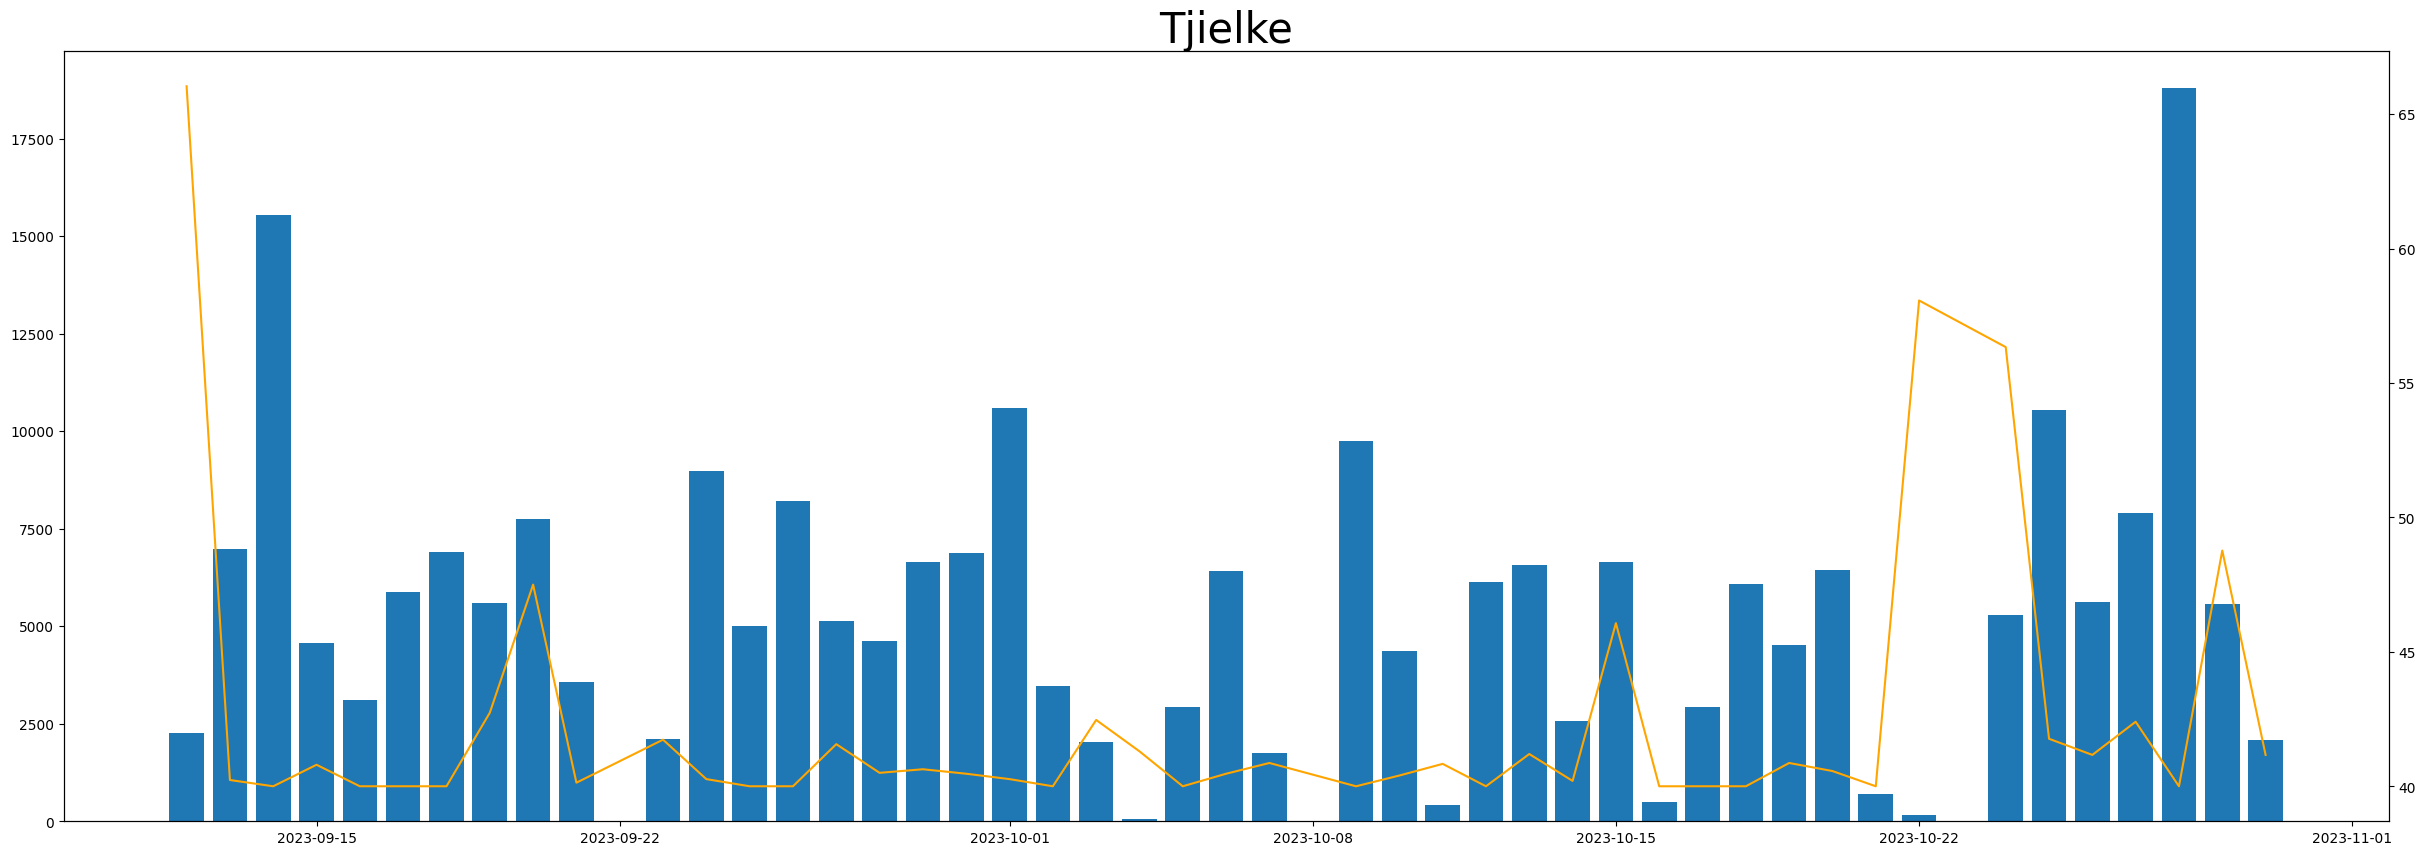

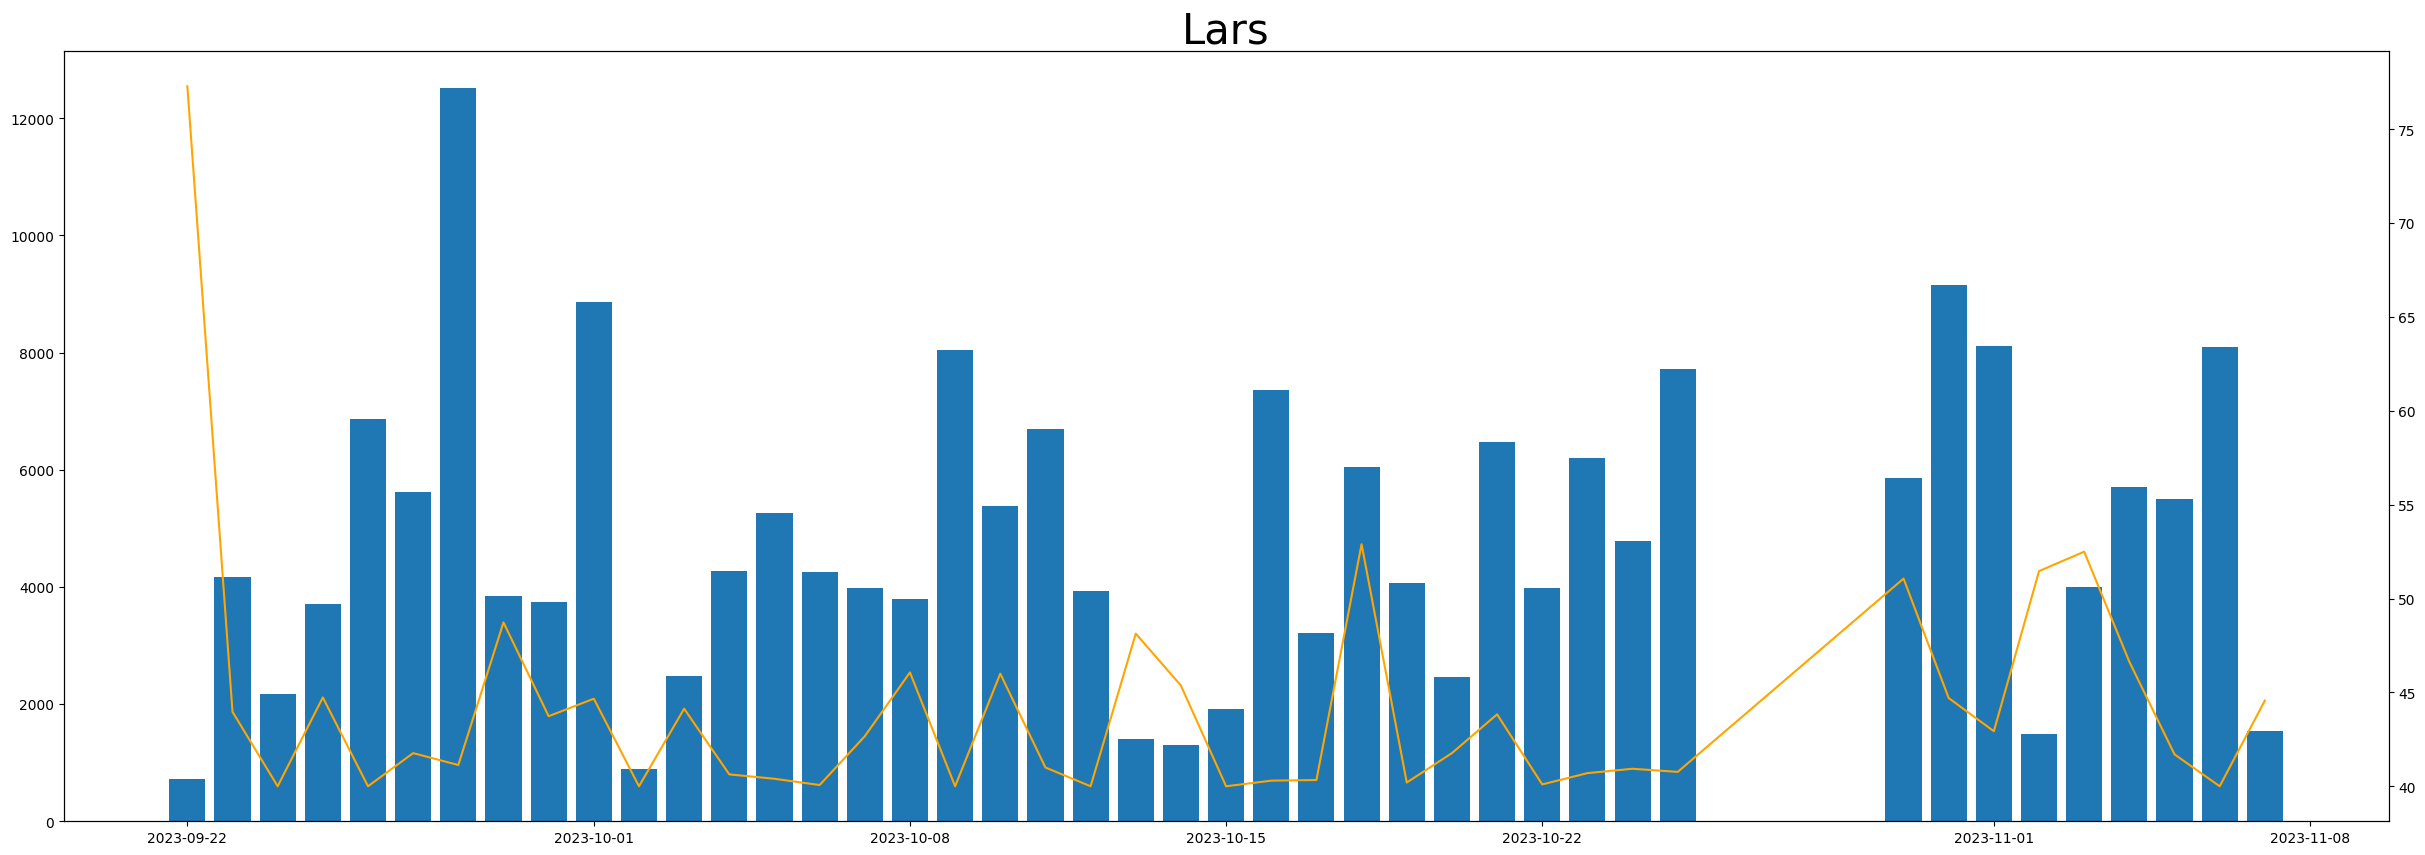

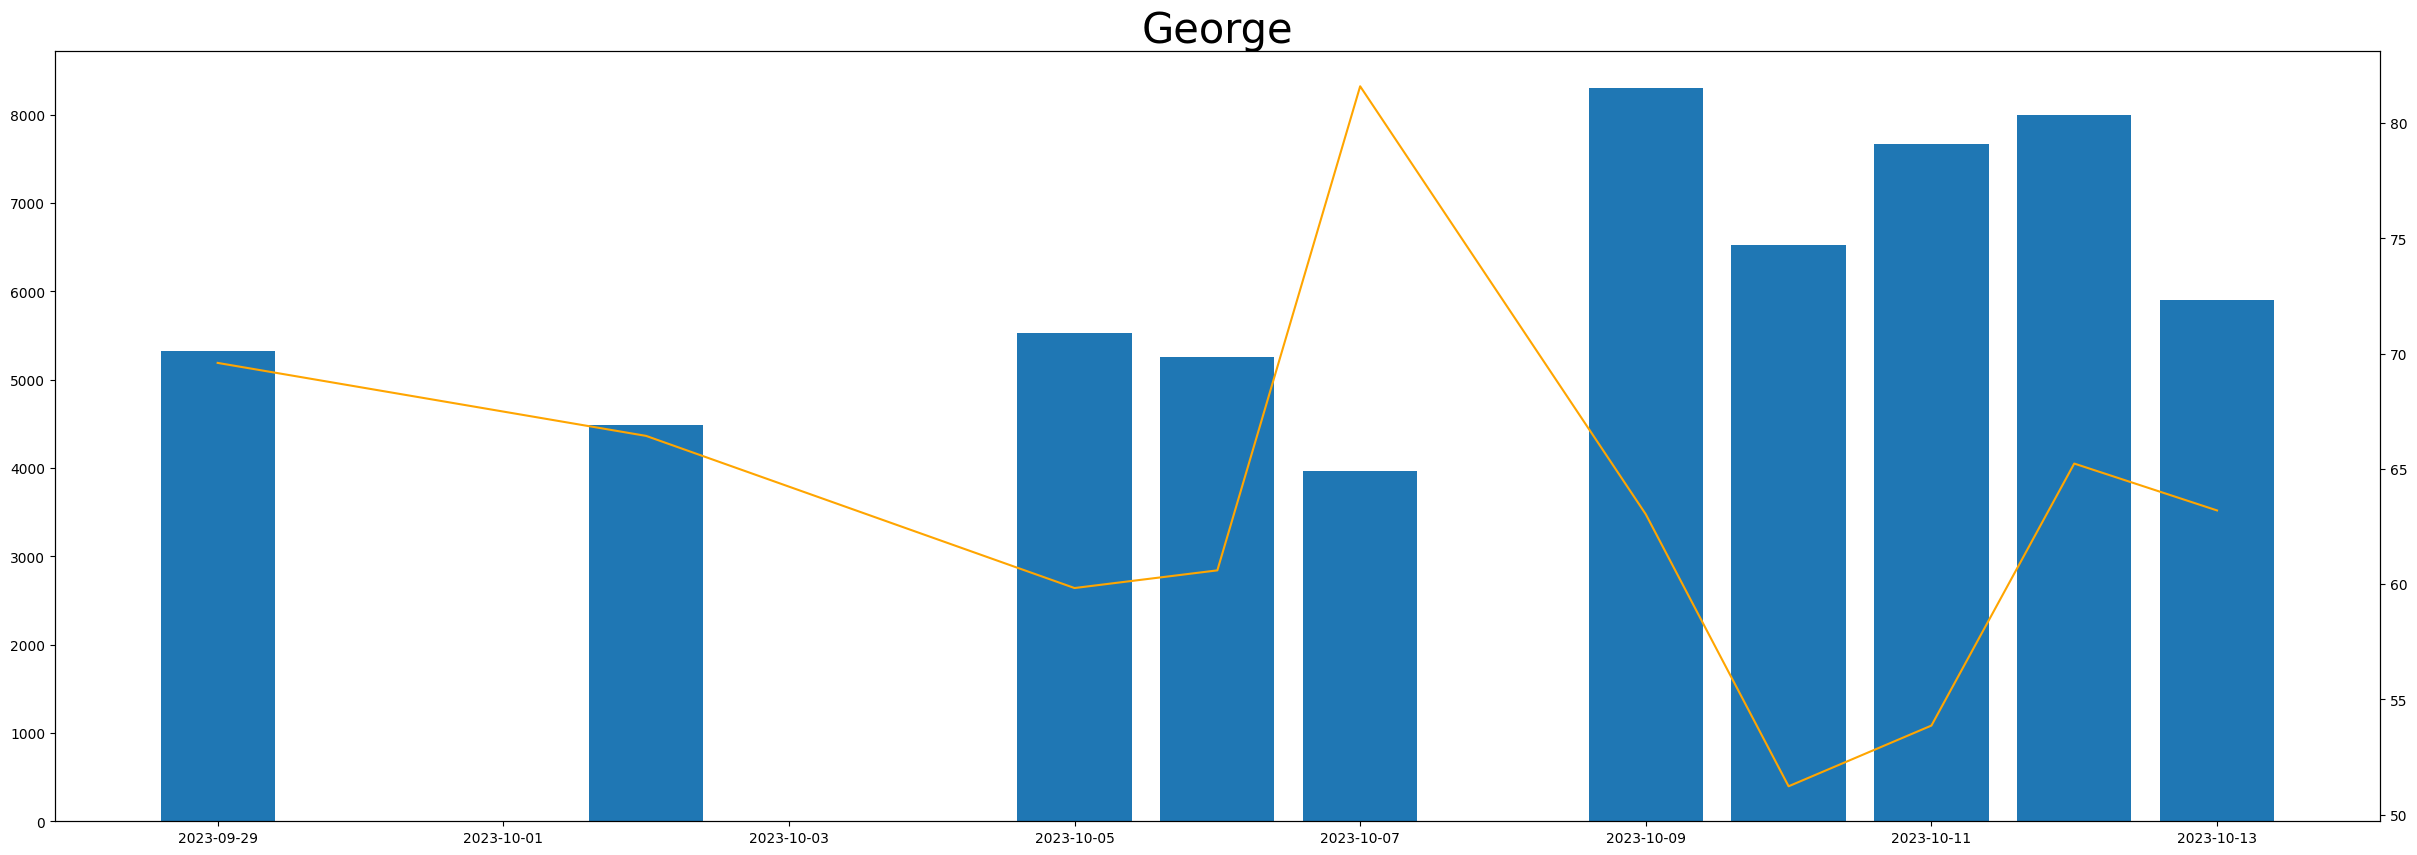

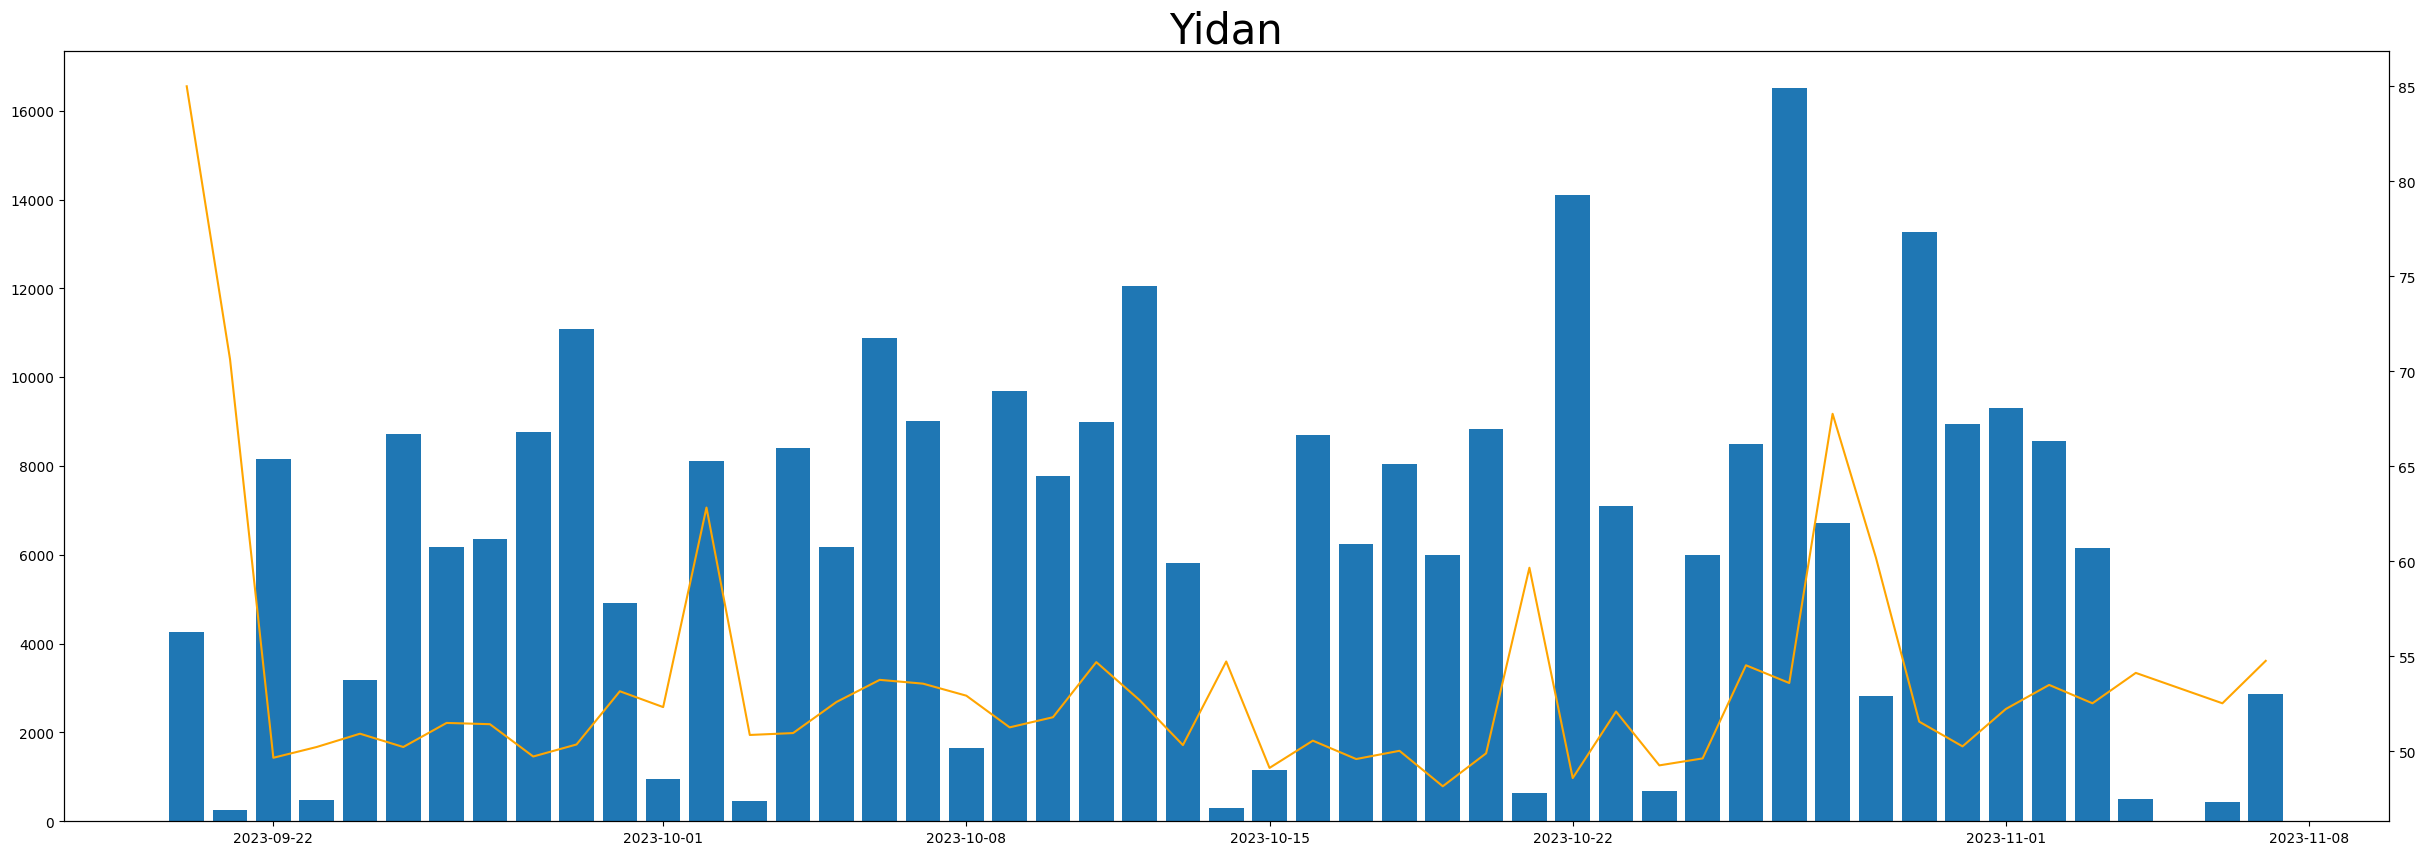

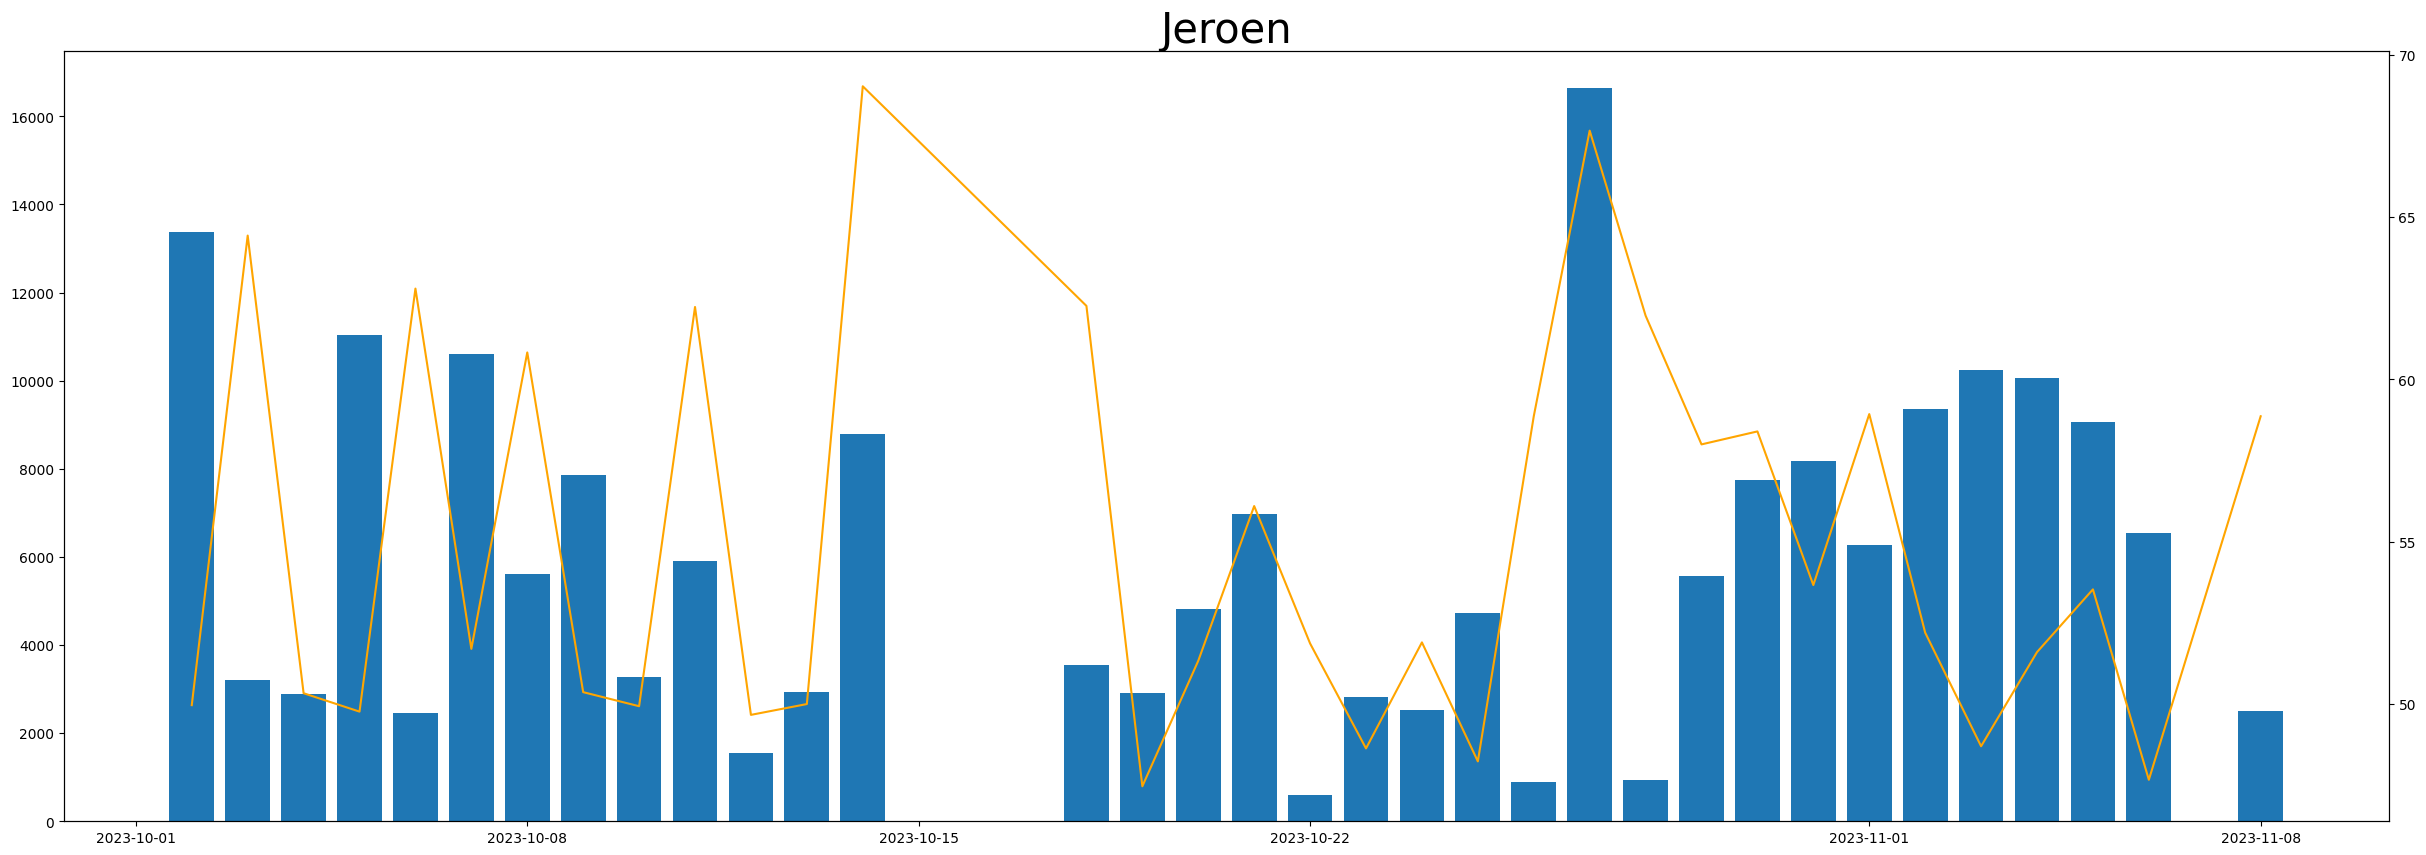

In [164]:
fig, ax1 = plt.subplots(figsize=(30, 10))
ax2 = ax1.twinx()

ax2.plot(Tjielke['date'], Tjielke['heartRate'], color = 'orange')
ax1.bar(Tjielke['date'], Tjielke['steps'])

plt.title('Tjielke', fontsize=30)
plt.xticks(rotation = 90);
#####################################################################

fig, ax1 = plt.subplots(figsize=(30, 10))
ax2 = ax1.twinx()

ax2.plot(Lars['date'], Lars['heartRate'], color = 'orange')
ax1.bar(Lars['date'], Lars['steps'])

plt.title('Lars', fontsize=30);
################################################################

fig, ax1 = plt.subplots(figsize=(30, 10))
ax2 = ax1.twinx()

ax2.plot(George['date'], George['heartRate'], color = 'orange')
ax1.bar(George['date'], George['steps'])

plt.title('George', fontsize=30);
##################################################################

fig, ax1 = plt.subplots(figsize=(30, 10))
ax2 = ax1.twinx()

ax2.plot(Yidan['date'], Yidan['heartRate'], color = 'orange')
ax1.bar(Yidan['date'], Yidan['steps'])

plt.title('Yidan', fontsize=30);
############################################################

fig, ax1 = plt.subplots(figsize=(30, 10))
ax2 = ax1.twinx()

ax2.plot(Jeroen['date'], Jeroen['heartRate'], color = 'orange')
ax1.bar(Jeroen['date'], Jeroen['steps'])

plt.title('Jeroen', fontsize=30)
plt.xticks(rotation = 90);
##############################

In [165]:
controlDataT = Tjielke[Tjielke['walked outside'] == 0]['heartRate']
testDataT = Tjielke[Tjielke['walked outside'] == 1]['heartRate']
alpha = 0.05

t_stat, p_value = stats.ttest_ind(controlDataT, testDataT, alternative='greater')
print(p_value)
if p_value < alpha:
    print('clear difference')
else:
    print('no difference')

0.8818949188279055
no difference


In [168]:
allControlData = preprocessed_df[preprocessed_df['walked outside'] == 0]['heartRate']
allTestData = preprocessed_df[preprocessed_df['walked outside'] == 1]['heartRate']
alpha = 0.05

t_stat, p_value = stats.ttest_ind(allControlData, allTestData, alternative='greater')
print(allControlData.mean())
print(allTestData.mean())
print(p_value)
if p_value < alpha:
    print('clear difference')
else:
    print('no difference')

48.733333333333334
50.75533333333334
0.9149082033275122
no difference


In [169]:


correlation = preprocessed_df['steps'].corr(preprocessed_df['heartRate'])
print(f"Pearson correlation coefficient: {correlation}")


Pearson correlation coefficient: -0.022274141530935702


In [170]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(preprocessed_df['steps'], preprocessed_df['heartRate'])
print(f"Slope: {slope}, Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")
print(f"P-value for the slope: {p_value}")

Slope: -5.5923068916510024e-05, Intercept: 49.60895780642641
R-squared value: 0.0004961373809401546
P-value for the slope: 0.7659865498980248


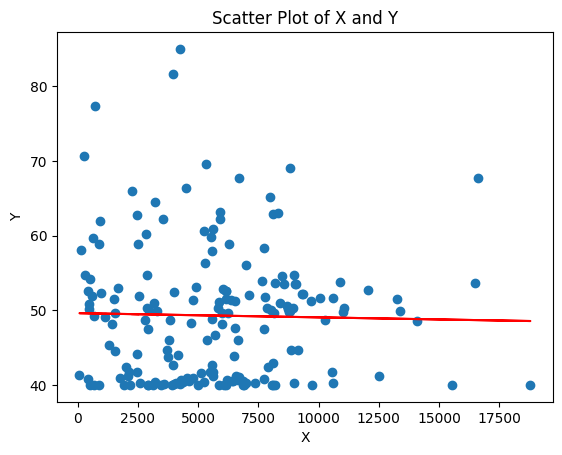

In [171]:
import matplotlib.pyplot as plt

x = preprocessed_df['steps']
y = preprocessed_df['heartRate']

plt.scatter(preprocessed_df['steps'], preprocessed_df['heartRate'])

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, label=f'Line: y = {m:.2f}x + {b:.2f}', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y')
plt.show()
